<a href="https://colab.research.google.com/github/nbeeeel/SuperResolution/blob/main/Final_SISR_Fine_tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Installing the Required Packages**

In [ ]:
pip install super-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install lpips

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 581.7 kB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 11.9 MB/s eta 0:00:00


#**Importing Required Packages**

In [ ]:
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity

In [ ]:
from super_image import EdsrModel, ImageLoader
from super_image import CarnModel, ImageLoader
from datasets import load_dataset
from super_image.data import EvalDataset, TrainDataset, augment_five_crop
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
import requests
import os
import pandas as pd
from datasets import Dataset
import cv2
from google.colab.patches import cv2_imshow

#**Loading the dataset**

In [ ]:
#data_path = '/content/drive/MyDrive/Project on SISR/LR.zip (Unzipped Files)/LR'

In [ ]:
Lt_path ='/content/drive/MyDrive/Project on SISR/LR.zip (Unzipped Files)/LR'

In [ ]:
#data_path1 = '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR'

In [ ]:
Rt_path = '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR'

In [ ]:
train_hr = '/content/drive/MyDrive/Project on SISR/Train/HR'

In [ ]:
train_lr = '/content/drive/MyDrive/Project on SISR/Train/LR'

In [ ]:
test_hr = '/content/drive/MyDrive/Project on SISR/Test/HR'

In [ ]:
test_lr ='/content/drive/MyDrive/Project on SISR/Test/LR'

In [ ]:
test_list_lr = os.listdir(Lt_path)
test_list_hr = os.listdir(Rt_path)


In [ ]:
test_list_hr

['0611143_HR_04803_18300_07068.jpeg',
 '0611143_HR_04525_25802_06754.jpeg',
 '0611143_HR_04735_24702_06954.jpeg',
 '0611143_HR_04635_25804_06873.jpeg',
 '0611143_HR_04493_22602_06756.jpeg',
 '0611143_HR_04456_16502_06756.jpeg',
 '0611143_HR_04516_24902_06754.jpeg',
 '0611143_HR_04699_21102_06970.jpeg',
 '0611143_HR_04404_24404_06671.jpeg',
 '0611143_HR_04726_23802_06956.jpeg',
 '0611143_HR_04459_16800_06768.jpeg',
 '0611143_HR_04614_23702_06871.jpeg',
 '0611143_HR_04679_17000_06968.jpeg',
 '0611143_HR_04508_24103_06772.jpeg',
 '0611143_HR_04487_22002_06754.jpeg',
 '0611143_HR_04600_22302_06854.jpeg',
 '0611143_HR_04643_26604_06870.jpeg',
 '0611143_HR_04620_24302_06854.jpeg',
 '0611143_HR_04520_25302_06754.jpeg',
 '0611143_HR_04693_18400_06970.jpeg',
 '0611143_HR_04593_21602_06854.jpeg',
 '0611143_HR_04810_21002_07068.jpeg',
 '0611143_HR_04427_26702_06654.jpeg',
 '0611143_HR_04809_20902_07068.jpeg',
 '0611143_HR_04673_16400_06970.jpeg',
 '0611143_HR_04628_25102_06854.jpeg',
 '0611143_HR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_list_lr = sorted(test_list_lr)
test_list_hr = sorted(test_list_hr)

In [ ]:
test_paths = {
    'lr': [],
    'hr': []
}

In [ ]:
image_paths = {
    'lr': [],
    'hr': []
}

In [ ]:
t_lr = test_list_lr[:200]
t_hr = test_list_hr[:200]

In [ ]:
#t_lr = test_list_lr[0:800]
#t_hr = test_list_hr[0:800]

In [ ]:
file_list_lr = os.listdir(Lt_path)
file_list_hr = os.listdir(Rt_path)

In [ ]:
f_l_hr = test_list_hr[200:600]
f_l_lr = test_list_lr[200:600]

In [ ]:
len(f_l_lr)

400

In [ ]:
for i in range(0,len(f_l_hr)):
  f_l_hr[i]=os.path.join(Rt_path,f_l_hr[i])
for j in range(0,len(f_l_lr)):
  f_l_lr[j]=os.path.join(Lt_path,f_l_lr[j])

In [ ]:
for i in range(0,len(t_hr)):
  t_hr[i]=os.path.join(Rt_path,t_hr[i])
for j in range(0,len(t_lr)):
  t_lr[j]=os.path.join(Lt_path,t_lr[j])

In [ ]:
t_hr

['/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00001_21602_00052.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00002_21702_00052.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00003_21802_00053.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00004_21502_00156.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00005_21602_00154.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00006_21702_00154.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00007_21802_00154.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00008_21902_00154.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)/HR/0611143_HR_00009_22002_00154.jpeg',
 '/content/drive/MyDrive/Project on SISR/HR.zip (Unzipped Files)

In [ ]:
# Iterate through HR image files
for hr_file in t_hr:
  test_paths['hr'].append(hr_file)

# Iterate through LR image files
for lr_file in t_lr:
  test_paths['lr'].append(lr_file)

In [ ]:
# Iterate through HR image files
for hr_file in f_l_hr:
  image_paths['hr'].append(hr_file)

# Iterate through LR image files
for lr_file in f_l_lr:
  image_paths['lr'].append(lr_file)

#**Downloading First Model-CARN**

In [ ]:
model = CarnModel.from_pretrained('eugenesiow/carn', scale=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


https://huggingface.co/eugenesiow/carn/resolve/main/pytorch_model_2x.pt


In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, image_paths_dict, transform=None):
        self.image_paths_dict = image_paths_dict
        self.transform = transform

        # Extract keys 'hr' and 'lr' from the dictionary
        self.hr_image_paths = image_paths_dict['hr']
        self.lr_image_paths = image_paths_dict['lr']

    def __len__(self):
        return len(self.hr_image_paths)  # Assuming both HR and LR paths have the same length

    def __getitem__(self, index):
        hr_path = self.hr_image_paths[index]
        lr_path = self.lr_image_paths[index]

        hr_image = Image.open(hr_path).convert("RGB")
        lr_image = Image.open(lr_path).convert("RGB")

        if self.transform:
            hr_image = self.transform(hr_image)
            lr_image = self.transform(lr_image)

        return {'hr_image': hr_image, 'lr_image': lr_image}

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((202, 202)),  # Resize to desired size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
df = pd.DataFrame.from_dict(image_paths)

In [ ]:
df

,lr,hr
0,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...
1,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...
2,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...
3,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...
4,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...
...,...,...
395,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...
396,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...
397,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...
398,/content/drive/MyDrive/Project on SISR/LR.zip ...,/content/drive/MyDrive/Project on SISR/HR.zip ...


In [ ]:
val = pd.DataFrame.from_dict(test_paths)

In [ ]:
from datasets import Dataset

In [ ]:
custom_dataset = Dataset.from_pandas(df)

In [ ]:
val_dataset = Dataset.from_pandas(val)

In [ ]:
# Instantiate the CustomDataset
custom_dataset = CustomDataset(custom_dataset, transform=transform)

In [ ]:
val_dataset = CustomDataset(val_dataset,transform=transform)

In [ ]:
# Create DataLoader
batch_size = 8
dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Define the device (GPU if available, otherwise CPU)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch.optim as optim

In [ ]:
# Move model and loss function to the device
#model.to(device)
#criterion.to(device)

MSELoss()

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
import PIL

In [ ]:
from torch.utils.data.dataloader import default_collate

def custom_collate(batch):
    elem = batch[0]
    if isinstance(elem, PIL.Image.Image):
        return batch
    return default_collate(batch)

In [ ]:
validation_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
# Initialize lists to store PSNR and SSIM values
psnr_values1 = []
ssim_values1 = []
lpips_value1 = []
mse_1 =[]
history1 = []  # Store PSNR and SSIM values after each epoch

In [ ]:
# Initialize lists to store PSNR and SSIM values
psnr_values2 = []
ssim_values2 = []
lpips_value2 = []
mse_2 =[]
history2 = []

In [ ]:
def lpips1(real_samples, generated_samples):
  # Calculate LPIPS
  # Resize image to desired shape
  i1 = cv2.resize(real_samples, (202, 202))
  i2 = cv2.resize(generated_samples, (202, 202))
  # Normalize pixel values to range [-1, 1]
  i1 = i1.astype(float) / 127.5 - 1.0
  i2 = i2.astype(float) / 127.5 - 1.0

  # Convert to tensor and add batch dimension
  i1 = torch.tensor(i1).permute(2, 0, 1).unsqueeze(0)
  i2 = torch.tensor(i2).permute(2, 0, 1).unsqueeze(0)

  i1 = i1.to(torch.float32)  # or torch.float32, depending on your case
  i2 = i2.to(torch.float32)
  lpipss = LearnedPerceptualImagePatchSimilarity(net_type='squeeze')
  mean_lpips=lpipss(i1,i2)
  return mean_lpips

#**Training**

In [ ]:
# Training loop
for epoch in range(50):
    model.train()
    for batch in dataloader:
        hr_images = batch['hr_image']
        lr_images = batch['lr_image']

        # Resize hr_images to match lr_images dimensions
        lr_images_resized = torch.nn.functional.interpolate(lr_images, size=hr_images.shape[-2:], mode='bilinear', align_corners=False)

        # # Move images to device
        #hr_images_resized =lr_images_resized.to(device)
        #lr_images = lr_images.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        sr_images = model(lr_images)

        # Resize sr_images to match hr_images dimensions
        sr_images_resized = torch.nn.functional.interpolate(sr_images, size=lr_images.shape[-2:], mode='bilinear', align_corners=False)

        # Move sr_images_resized to the same device as hr_images
        #sr_images_resized = sr_images_resized.to(hr_images_resized.device)

        # Compute loss
        #loss = criterion(sr_images_resized, hr_images_resized)

        # Backpropagation and optimization
        loss.backward()
        #optimizer.step()

        # Print progress
        print(f"Epoch [{epoch+1}/{50}], Batch Loss: {loss.item():.4f}")

    model.eval()
    with torch.no_grad():
      batch_psnr = []
      batch_ssim = []
      batch_lpip = []
      for val_batch in validation_dataloader:
          hr_images_val = val_batch['hr_image']
          lr_images_val = val_batch['lr_image']
          #hr_images_val = hr_images_val.to(device)
          #lr_images_val = lr_images_val.to(device)

          # Forward pass
          sr_images_val = model(lr_images_val)

          for i in range(len(hr_images_val)):
              sr_image = sr_images_val[i].cpu().numpy().transpose((1, 2, 0))
              hr_image = hr_images_val[i].cpu().numpy().transpose((1, 2, 0))
              sr_image = (sr_image  * 255.0).astype(np.uint8)
              hr_image = (hr_image * 255.0).astype(np.uint8)

              # Resize HR and SR images to the same size
              hr_image_resized = cv2.resize(hr_image, (sr_image.shape[1], sr_image.shape[0]))
              batch_lpip.append(lpips1(hr_image_resized,sr_image))
              batch_psnr.append(psnr(hr_image_resized, sr_image))
              batch_ssim.append(ssim(hr_image_resized, sr_image, multichannel=True))

    if len(batch_psnr) > 0:
        avg_psnr = np.mean(batch_psnr)
        avg_ssim = np.mean(batch_ssim)
        avg_lpip = np.mean(batch_lpip)
        psnr_values2.append(avg_psnr)
        ssim_values2.append(avg_ssim)
        lpips_value2.append(avg_lpip)
        mse_2.append(loss.item)
        # Print and store PSNR and SSIM values
        print(f"Epoch [{epoch+1}/{50}], Avg PSNR: {avg_psnr:.4f}, Avg SSIM: {avg_ssim:.4f}, Avg LPIPS : {avg_lpip:.4f}")
        history2.append({'epoch': epoch + 1, 'psnr': avg_psnr, 'ssim': avg_ssim})


#**Evaluating First Model**

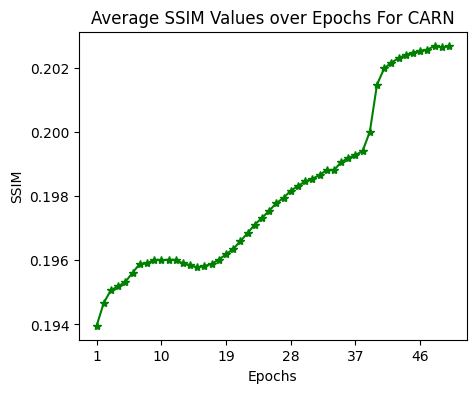

In [ ]:
epochs = list(range(1, 51))
psnr_values_subset = ssim_values2[::10]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, ssim_values2, marker='*',color='green')
plt.title('Average SSIM Values over Epochs For CARN')
plt.xlabel('Epochs')
plt.ylabel('SSIM')
plt.xticks(epochs[::9], epochs[::9])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()

In [ ]:
lpips_value1 = lpips_value1[:30]

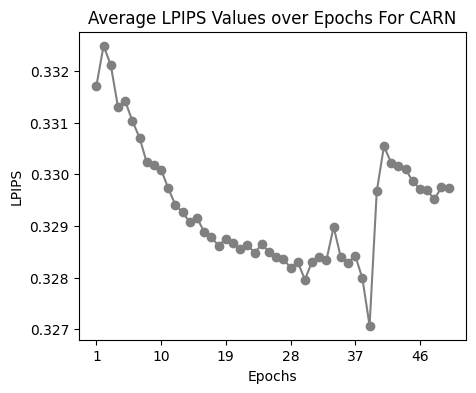

In [ ]:
epochs = list(range(1, 51))
psnr_values_subset = lpips_value2[::10]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, lpips_value2, marker='o',color='gray')
plt.title('Average LPIPS Values over Epochs For CARN')
plt.xlabel('Epochs')
plt.ylabel('LPIPS')
plt.xticks(epochs[::9], epochs[::9])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()

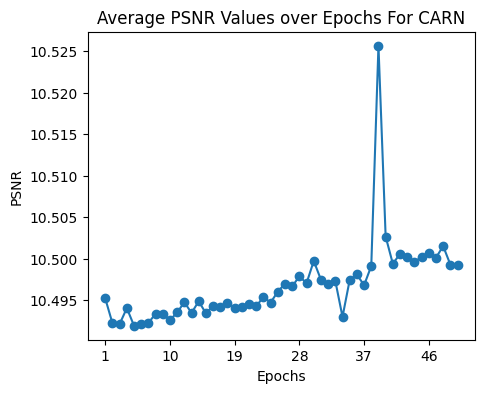

In [ ]:
epochs = list(range(1, 51))
psnr_values_subset = psnr_values2[::10]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, psnr_values2, marker='o')
plt.title('Average PSNR Values over Epochs For CARN')
plt.xlabel('Epochs')
plt.ylabel('PSNR')
plt.xticks(epochs[::9], epochs[::9])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()

In [ ]:
epochs = list(range(1, 51))
psnr_values_subset = mse_1[::10]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, mse_1, marker='*',color='purple')
plt.title('Average MSE Values over Epochs For CARN')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.xticks(epochs[::9], epochs[::9])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()

#**Downloading Second Model --EDSR**

In [ ]:
#EDSR Model
model1 = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, image_paths_dict, transform=None):
        self.image_paths_dict = image_paths_dict
        self.transform = transform

        # Extract keys 'hr' and 'lr' from the dictionary
        self.hr_image_paths = image_paths_dict['hr']
        self.lr_image_paths = image_paths_dict['lr']

    def __len__(self):
        return len(self.hr_image_paths)  # Assuming both HR and LR paths have the same length

    def __getitem__(self, index):
        hr_path = self.hr_image_paths[index]
        lr_path = self.lr_image_paths[index]

        hr_image = Image.open(hr_path).convert("RGB")
        lr_image = Image.open(lr_path).convert("RGB")

        if self.transform:
            hr_image = self.transform(hr_image)
            lr_image = self.transform(lr_image)

        return {'hr_image': hr_image, 'lr_image': lr_image}


In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((202, 202)),  # Resize to desired size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
df = pd.DataFrame.from_dict(image_paths)

In [ ]:
val = pd.DataFrame.from_dict(test_paths)

In [ ]:
from datasets import Dataset

In [ ]:
custom_dataset = Dataset.from_pandas(df)

In [ ]:
val_dataset = Dataset.from_pandas(val)

In [ ]:
# Instantiate the CustomDataset
custom_dataset = CustomDataset(custom_dataset, transform=transform)

In [ ]:
val_dataset = CustomDataset(val_dataset,transform=transform)

In [ ]:
# Create DataLoader
batch_size = 4
dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
import torch.optim as optim

In [ ]:
# Define loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
# Define the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Move model and loss function to the device
model1.to(device)
criterion.to(device)

MSELoss()

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
import PIL

In [ ]:
from torch.utils.data.dataloader import default_collate

def custom_collate(batch):
    elem = batch[0]
    if isinstance(elem, PIL.Image.Image):
        return batch
    return default_collate(batch)

In [ ]:
validation_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
# Initialize lists to store PSNR and SSIM values
psnr_values1 = []
ssim_values1 = []
lpips_value1 = []
mse_1 =[]
history1 = []  # Store PSNR and SSIM values after each epoch

In [ ]:
# Initialize lists to store PSNR and SSIM values
psnr_values2 = []
ssim_values2 = []
lpips_value2 = []
mse_2 =[]
history2 = []

In [ ]:
def lpips1(real_samples, generated_samples):
  # Calculate LPIPS
  # Resize image to desired shape
  i1 = cv2.resize(real_samples, (202, 202))
  i2 = cv2.resize(generated_samples, (202, 202))
  # Normalize pixel values to range [-1, 1]
  i1 = i1.astype(float) / 127.5 - 1.0
  i2 = i2.astype(float) / 127.5 - 1.0

  # Convert to tensor and add batch dimension
  i1 = torch.tensor(i1).permute(2, 0, 1).unsqueeze(0)
  i2 = torch.tensor(i2).permute(2, 0, 1).unsqueeze(0)

  i1 = i1.to(torch.float32)  # or torch.float32, depending on your case
  i2 = i2.to(torch.float32)
  lpipss = LearnedPerceptualImagePatchSimilarity(net_type='squeeze')
  mean_lpips=lpipss(i1,i2)
  return mean_lpips

#**Training EDSR**

In [ ]:
# Training loop
for epoch in range(50):
    model1.train()
    for batch in dataloader:
        hr_images = batch['hr_image']
        lr_images = batch['lr_image']

        # Resize hr_images to match lr_images dimensions
        lr_images_resized = torch.nn.functional.interpolate(lr_images, size=hr_images.shape[-2:], mode='bilinear', align_corners=False)

        # # Move images to device
        hr_images_resized =lr_images_resized.to(device)
        lr_images = lr_images.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        sr_images = model1(lr_images)

        # Resize sr_images to match hr_images dimensions
        sr_images_resized = torch.nn.functional.interpolate(sr_images, size=lr_images.shape[-2:], mode='bilinear', align_corners=False)

        # Move sr_images_resized to the same device as hr_images
        sr_images_resized = sr_images_resized.to(hr_images_resized.device)

        # Compute loss
        loss = criterion(sr_images_resized, hr_images_resized)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Print progress
        print(f"Epoch [{epoch+1}/{50}], Batch Loss: {loss.item():.4f}")

    model1.eval()
    with torch.no_grad():
      batch_psnr = []
      batch_ssim = []
      batch_lpip = []
      for val_batch in validation_dataloader:
          hr_images_val = val_batch['hr_image']
          lr_images_val = val_batch['lr_image']
          hr_images_val = hr_images_val.to(device)
          lr_images_val = lr_images_val.to(device)

          # Forward pass
          sr_images_val = model1(lr_images_val)

          for i in range(len(hr_images_val)):
              sr_image = sr_images_val[i].cpu().numpy().transpose((1, 2, 0))
              hr_image = hr_images_val[i].cpu().numpy().transpose((1, 2, 0))
              sr_image = (sr_image  * 255.0).astype(np.uint8)
              hr_image = (hr_image * 255.0).astype(np.uint8)

              # Resize HR and SR images to the same size
              hr_image_resized = cv2.resize(hr_image, (sr_image.shape[1], sr_image.shape[0]))
              batch_lpip.append(lpips1(hr_image_resized,sr_image))
              batch_psnr.append(psnr(hr_image_resized, sr_image))
              batch_ssim.append(ssim(hr_image_resized, sr_image, multichannel=True))

    if len(batch_psnr) > 0:
        avg_psnr = np.mean(batch_psnr)
        avg_ssim = np.mean(batch_ssim)
        avg_lpip = np.mean(batch_lpip)
        psnr_values2.append(avg_psnr)
        ssim_values2.append(avg_ssim)
        lpips_value2.append(avg_lpip)
        mse_2.append(loss.item)
        # Print and store PSNR and SSIM values
        print(f"Epoch [{epoch+1}/{50}], Avg PSNR: {avg_psnr:.4f}, Avg SSIM: {avg_ssim:.4f}, Avg LPIPS : {avg_lpip:.4f}")
        history2.append({'epoch': epoch + 1, 'psnr': avg_psnr, 'ssim': avg_ssim})

Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0002
Epoch [1/50], Batch Loss: 0.0001
Epoch [1/5

Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth
100%|██████████| 4.73M/4.73M [00:00<00:00, 94.8MB/s]
<ipython-input-52-aab4fb30eacf>:61: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  batch_ssim.append(ssim(hr_image_resized, sr_image, multichannel=True))


Epoch [1/50], Avg PSNR: 10.5265, Avg SSIM: 0.1763, Avg LPIPS : 0.3064
Epoch [2/50], Batch Loss: 0.0006
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0004
Epoch [2/50], Batch Loss: 0.0004
Epoch [2/50], Batch Loss: 0.0004
Epoch [2/50], Batch Loss: 0.0004
Epoch [2/50], Batch Loss: 0.0004
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0004
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0001
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0003
Epoch [2/50], Batch Loss: 0.0002
Epoch [2/50], Batch Loss: 0.0002
Epoch 

#**Evaluating**

In [ ]:
lpips_value1 = lpips_value1[:30]

In [ ]:
epochs = list(range(1, 31))
psnr_values_subset = lpips_value1[::10]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, lpips_value1, marker='o',color='red')
plt.title('Average LPIPS Values over Epochs For EDSR')
plt.xlabel('Epochs')
plt.ylabel('LPIPS')
plt.xticks(epochs[::9], epochs[::9])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()

In [ ]:
# SSIM values for EDSR without tuning
ssim_1=[0.7732642359069212, 0.7942652130594354, 0.8298657995981104, 0.6997414989450842, 0.571942907594682, 0.591104958282833, 0.6107271621095882, 0.6183475723592103, 0.6550387104999227, 0.6418202654446169]

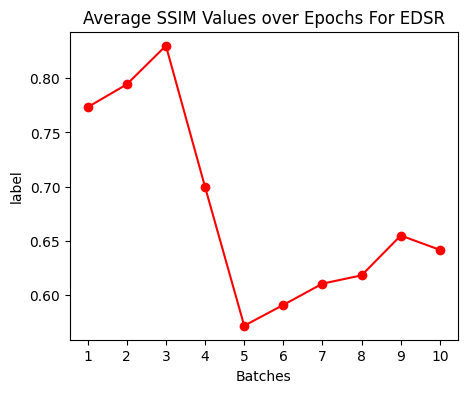

In [ ]:
epochs = list(range(1, 11))
ssim_values_subset = ssim_1[::1]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, ssim_1, marker='o',color='red')
plt.title('Average SSIM Values over Epochs For EDSR')
plt.xlabel('Batches')
plt.ylabel('label')
plt.xticks(epochs[::1], epochs[::1])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()

In [ ]:
psnr_1=[72.93093192722074, 73.11435567682798, 74.22055662500905, 71.54981540981056, 70.07707128745021, 70.29542430367272, 70.90052650173801, 70.90548814701097, 71.34631925974226, 71.92826047472633]

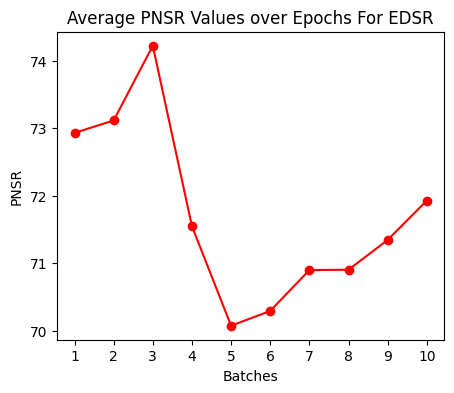

In [ ]:

epochs = list(range(1, 11))

plt.figure(figsize=(5, 4))
plt.plot(epochs, psnr_1, marker='o', color='red')
plt.title('Average PNSR Values over Epochs For EDSR')
plt.xlabel('Batches')
plt.ylabel('PNSR')
plt.xticks(epochs)  # Since there are only 10 epochs, there's no need to slice
plt.grid(False)
plt.show()


In [ ]:
mse_1=[0.0033112136, 0.0031742768, 0.0024605074, 0.0045509157, 0.0063881227, 0.006074883, 0.0052847895, 0.005278756, 0.004769232, 0.0041711354]

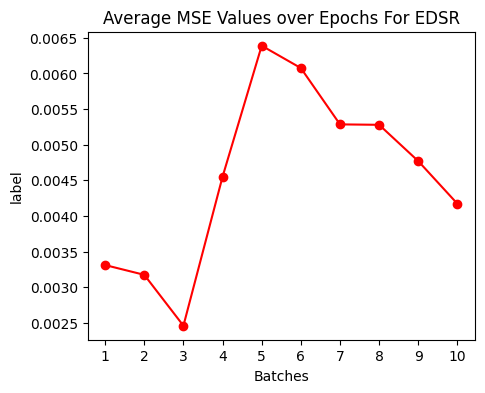

In [ ]:
epochs = list(range(1, 11))
mse_values_subset = mse_1[::1]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, mse_1, marker='o',color='red')
plt.title('Average MSE Values over Epochs For EDSR')
plt.xlabel('Batches')
plt.ylabel('label')
plt.xticks(epochs[::1], epochs[::1])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()

In [ ]:
# SSIM values for CARN without tuning

In [ ]:
ssim_2=[0.7737577865123237, 0.7944494714594906, 0.8301472326029621, 0.6996477057227786, 0.572262490391752, 0.5913333572839858, 0.6109944568257839, 0.6183460061630516, 0.6555966297040889, 0.6422757854830691]

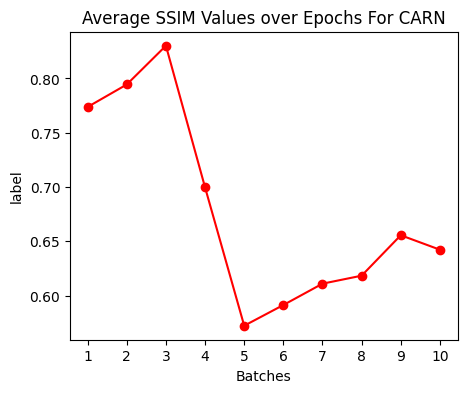

In [ ]:
epochs = list(range(1, 11))
ssim_values_subset = ssim_2[::1]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, ssim_2, marker='o',color='red')
plt.title('Average SSIM Values over Epochs For CARN')
plt.xlabel('Batches')
plt.ylabel('label')
plt.xticks(epochs[::1], epochs[::1])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()

In [ ]:
pnsr_2= [72.94907037829765, 73.12809674818251, 74.23978682504358, 71.55549441077198, 70.08218840449976, 70.30158981426193, 70.9062604310431, 70.91042054414228, 71.35420655798335, 71.938539284049]

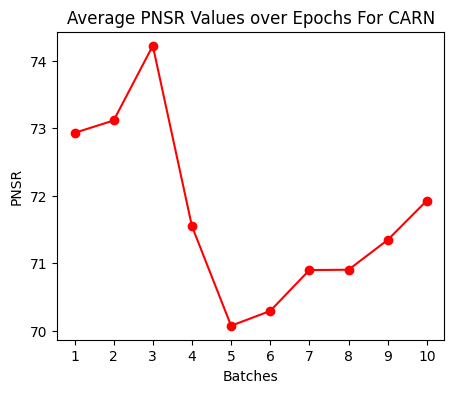

In [ ]:

epochs = list(range(1, 11))

plt.figure(figsize=(5, 4))
plt.plot(epochs, psnr_1, marker='o', color='red')
plt.title('Average PNSR Values over Epochs For CARN')
plt.xlabel('Batches')
plt.ylabel('PNSR')
plt.xticks(epochs)  # Since there are only 10 epochs, there's no need to slice
plt.grid(False)
plt.show()

In [ ]:
mse_2= [0.0032974128, 0.0031642492, 0.0024496368, 0.0045449687, 0.0063806, 0.006066265, 0.0052778167, 0.0052727633, 0.0047605783, 0.0041612755]

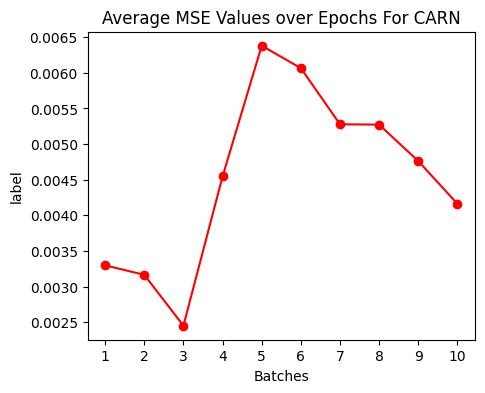

In [ ]:
epochs = list(range(1, 11))
mse_values_subset = mse_2[::1]  # Display only every 10th epoch value

plt.figure(figsize=(5, 4))
plt.plot(epochs, mse_2, marker='o',color='red')
plt.title('Average MSE Values over Epochs For CARN')
plt.xlabel('Batches')
plt.ylabel('label')
plt.xticks(epochs[::1], epochs[::1])  # Display only every 10th epoch on the x-axis
plt.grid(False)
plt.show()